Libraries

In [15]:
import tensorflow as tf ; import numpy as np ; import matplotlib.pyplot as plt ; import pandas as pd
from tensorflow import keras ; from tqdm import tqdm ; from keras.preprocessing.image import load_img
import os 

In [16]:
Train_directory = "../../Data/Emotions/train"
Test_directory = "../../Data/Emotions/test"

Making Dataframe

In [17]:
def creat_df(dir):

    Image = []
    Labels = []
    for DirectoryName in os.listdir(dir):
        for ImageName in os.listdir(os.path.join(dir , DirectoryName)):
            Image.append(os.path.join(dir , DirectoryName , ImageName))
            Labels.append(DirectoryName)
        print(f"{dir.split("../Data/Emotions/")[1]}: {DirectoryName} Added.")
    return(Image , Labels)

In [18]:
train = pd.DataFrame()
train["Image"] , train["Labels"] = creat_df(Train_directory)
test = pd.DataFrame()
test["Image"] , test["Labels"] = creat_df(Test_directory)

train: angry Added.
train: disgusted Added.
train: fearful Added.
train: happy Added.
train: neutral Added.
train: sad Added.
train: surprised Added.
test: angry Added.
test: disgusted Added.
test: fearful Added.
test: happy Added.
test: neutral Added.
test: sad Added.
test: surprised Added.


In [19]:
len(set(train["Labels"])) # Number of labels

7

In [20]:
train.shape , test.shape

((28709, 2), (7178, 2))

In [21]:
train.head()

,Image,Labels
0,../../Data/Emotions/train\angry\im0.png,angry
1,../../Data/Emotions/train\angry\im1.png,angry
2,../../Data/Emotions/train\angry\im10.png,angry
3,../../Data/Emotions/train\angry\im100.png,angry
4,../../Data/Emotions/train\angry\im1000.png,angry


Extracting data

In [22]:
def Extracting_Features(images):

    Features = []
    for image in tqdm(images):
        img = load_img(image , color_mode="grayscale") # Image into PIL format
        img = np.array(img)
        Features.append(img)
    Features = np.array(Features) # Making batch
    Features = Features.reshape(len(Features) , 48,48,1) # channel = 1 and image size = 48*48
    return Features

In [23]:
train_features = Extracting_Features(train["Image"])
test_features = Extracting_Features(test["Image"])

100%|██████████| 7178/7178 [00:01<00:00, 4202.75it/s]


Normalization

In [24]:
x_train = train_features/255.0
x_test = test_features/255.0

Preprocessing

In [25]:
from keras.utils import  to_categorical
from sklearn.preprocessing import LabelEncoder

Encoder = LabelEncoder()
Encoder.fit(train["Labels"])

y_train = Encoder.transform(train["Labels"])
y_test = Encoder.transform(test["Labels"])

y_train = to_categorical(y_train.reshape(-1 , 1) , 7)
y_test = to_categorical(y_test.reshape(-1 , 1) , 7)

Model

In [39]:
model = keras.Sequential()
model.add(keras.layers.Input(shape = (48 , 48 , 1)))
model.add(keras.layers.Conv2D(128 , kernel_size = (3 , 3) , strides = (1 , 1) , padding = "valid" , activation = "relu"))
model.add(keras.layers.MaxPool2D(pool_size = (2 , 2)))
model.add(keras.layers.Conv2D(64 , kernel_size = (3 , 3) , strides = (1 , 1) , padding = "valid" , activation = "relu"))
model.add(keras.layers.MaxPool2D(pool_size = (2 , 2)))
model.add(keras.layers.Conv2D(32 , kernel_size = (3 , 3) , strides = (1 , 1) , padding = "valid" , activation = "relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPool2D(pool_size = (2 , 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units = 128 , activation = "relu"))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(units = 64 , activation = "relu"))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(units = 7 , activation = "softmax"))

model.compile(optimizer = "adam" , loss = tf.losses.categorical_crossentropy , metrics = ["accuracy"])

In [40]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 46, 46, 128)    │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 21, 21, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 8, 8, 32)       │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 8, 8, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 168,039 (656.40 KB)

 Trainable params: 167,975 (656.15 KB)

 Non-trainable params: 64 (256.00 B)

Train

In [41]:
hist = model.fit(x = x_train , y = y_train , epochs = 20 , batch_size = 256 , validation_data = (x_test , y_test))

Epoch 1/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 25s 207ms/step - accuracy: 0.2447 - loss: 1.8303 - val_accuracy: 0.2471 - val_loss: 1.8044
Epoch 2/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 23s 205ms/step - accuracy: 0.3811 - loss: 1.5821 - val_accuracy: 0.3249 - val_loss: 1.7520
Epoch 3/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 23s 204ms/step - accuracy: 0.4367 - loss: 1.4609 - val_accuracy: 0.3320 - val_loss: 1.7105
Epoch 4/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 23s 204ms/step - accuracy: 0.4539 - loss: 1.4300 - val_accuracy: 0.3665 - val_loss: 1.6304
Epoch 5/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 23s 205ms/step - accuracy: 0.4711 - loss: 1.3857 - val_accuracy: 0.4657 - val_loss: 1.4175
Epoch 6/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 23s 205ms/step - accuracy: 0.4850 - loss: 1.3528 - val_accuracy: 0.4595 - val_loss: 1.4934
Epoch 7/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 23s 204ms/step - accuracy: 0.4970 - loss: 1.3222 - val_accuracy: 0.4179 - val_loss: 1.4741
Epoch 8/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 23s 204ms/step - accuracy: 0.5146 - loss: 1

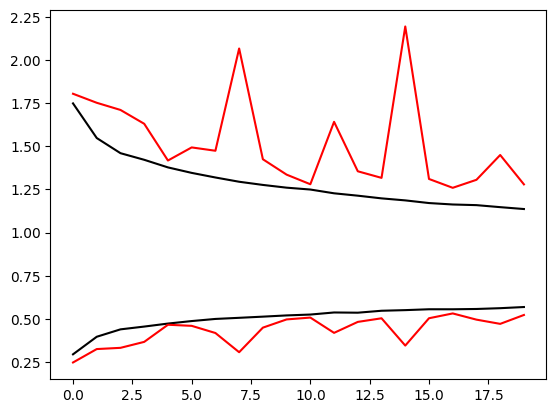

In [42]:
plt.plot(hist.history["accuracy"] , color = "black")
plt.plot(hist.history["val_accuracy"] , color = "red")
plt.plot(hist.history["loss"] , color = "black")
plt.plot(hist.history["val_loss"] , color = "red")

Saving

In [43]:
json = model.to_json()
with open("EmotionalFaces.json" , "w") as file:
    file.write(json)
model.save("EmotionalFaces.h5")